In [1]:
import numpy as np
from numpy.linalg import det, inv

from scipy.optimize import minimize

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


import sys
 
# setting path
sys.path.append('/Users/voicutu/Documents/GitHub/vdw_evolve/sandbox/vdw')
from anneling import Annealing1

In [2]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

#b1 = np.sqrt(2)*np.dot(R,a1);  b2 = np.sqrt(2)*np.dot(R,a2); #a2
b1 = [np.sqrt(2),0]; b2=[0,np.sqrt(2)];

B  = np.transpose([b1,b2]);

a = A#np.array([[0,1],[1,0]])
b = B#np.array([[0,5],[5,0]])

In [1]:
def at_sin(x, up =99999999):
    
    tr_x= (x + 0.5)
    
    if x<1:
        res = up*(1/(1+np.sqrt((x**2))) )* np.sin(tr_x*np.pi) +1/(x+0.00000000000001)
    else:
        res = (x-1)**2 -up*(1/(1+x**2))+1/(x+0.00000000000001)
    return res

X = [i*0.1 for i in range(0,50,1)]
Y= [at_sin(x) for x in X]

plt.scatter(X[5:],Y[5:])

NameError: name 'torch' is not defined

In [4]:
def strain_tune(x, tB_,optimize=True):
    
    
    strain = np.array([[1+x[0],0],
                       [0,1+x[1]]])
    
    # Strain*tB_strained =tB_ => tB_strained=inv(Strain)*tB 
    if optimize:
        print(x)
        print("setst:",det(strain))
        tB_strain = np.dot(inv(strain),tB_)
        cons =99999
        tB_con = 0  
        for row in tB_strain:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons+(x[1]**2+x[0]**2)*cons
        return tB_con
        
    return strain



In [5]:
def streined_proces(tB,strain_boundery):
    
#     def constraint1(x):
#         return 1 if (strain_boundery[0][0]<=x[0]<=strain_boundery[0][1]) and(strain_boundery[1][0]<=x[1]<=strain_boundery[1][1]) else 0
#     def constraint2(x):
# #         print("call",x)
        
#         return 0 if (1+x[1])*(1+x[0]) ==0 else  1
#     con1 = {'type': 'ineq', 'fun':constraint1}
#     con2 = {'type': 'ineq', 'fun':constraint2}
#     cons =([con1, con2])
    
    strain_cost = lambda x: strain_tune(x, tB_=tB)
    x0 = np.array([0, 0])
    res = minimize(strain_cost, x0, 
                   #constraints =cons,
                   bounds = strain_boundery,
                   method= 'L-BFGS-B'#'COBYLA'#L-BFGS-B',#
                  )
                   
                
#                options={'xatol': 1e-8, 'disp': True})
#     print("rx:",res.x)
#     print("cost:", strain_tune(res.x, tB, optimize=True))
    strein =  strain_tune(res.x, tB, optimize=False)
    return strein 

In [6]:
# a = np.array([[0,1],[1,0]])
# b = np.sqrt(2)*np.astrain_tune(res.x, tB, optimize=False)rray([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999,strain_boundery =[[-0.2e-9,0.2e-9],[-0.2e-9,0.2e-9]]):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        
        # Strain tunning 
        strain = streined_proces(tB,strain_boundery)
        tB= np.dot(strain,tB)
        
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =99999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        tA_lenghth =((tA[0][0]**2+tA[0][1]**2)+(tA[1][0]**2+tA[1][1]**2) )*100
        
        
        f =  at_sin(detTAa)+ tB_con**2 +tA_lenghth
        #((1-detTAa)**2)*k_p + tB_con**2
        
        f= pytorch.Variable(f, requires_grad=True)
        return f 

In [7]:
# Experiment settings

#Hyperparameters of the model
up = 99999999
bonds = [[-2*bond,2*bond] for _ in range(4)]

model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds':[[-2*bond,2*bond] for _ in range(4)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'known_min': -up,
    "start_point":[1,5,3,2,]
}



#
input_size = 4 # since our function has one variable this is a trivial scenario.
start_point = [1,5,3,2]

# Experiment
experiment = Annealing1(fit_fucntion ,start_point, model_par)

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002


In [8]:
epochs= 10
history_book = experiment.evolve( epochs, prints_p=5)

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:4|epoch:0|change:-2100716439.8374395|value:278818271.7796718
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-

setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.03305785123966942|epoch:5|change:2359823628.512141|value:24689562.110921104
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.016597510373443983|epoch:5|change:1481505688.639367|value:24689562.110921104
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.008316008316008316|epoch:0|change:1803191906.1225274|value:24689562.110921104
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0

[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.005873715124816448|epoch:5|change:2196221382.2815037|value:24689562.110921104
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+

setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.004540295119182747|epoch:0|change:693059901.1925478|value:24689

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0029390154298310073|epoch:5|change:338933012.188788|value:24689562.110921104
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00249843847595253|epoch:0|change:1402897785.9382281|value:24689562.110921104
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.

setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]

[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0

[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0018859028760018863|epoch:5|change:3771846702.5714035|value:24689562.110921104
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0015618898867629837|epoch:5|change:556534497.7319645|value:24685461.131297924
[0. 0

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.001470047776552738|epoch:0|change:5285010865.340256|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.

setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0013884068031933359|epoch:0|change:651108607.1278505|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0013153567905294311|epoch:0|change:2161231045.074371|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0

setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0012044564890093343|epoch:0|change:18226541180.674953|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0011490950876185003|epoch:5|change:791300896.0219293|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0010866612333604996|epoch:0|change:1333955065.9581664|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0010413954699297053|epoch:5|change:476054072.40357804|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0009898539965355103|epoch:0|change:1173241568.109651|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.000908884344467166|epoch:5|change:465026495.1667399|value:24685461.131297924
[0. 0.

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0008693762225603123|epoch:5|change:2100204286.3714797|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0008262755629002267|epoch:5|change:1955761964.3676393|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
sets

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

temp:0.0007632131272657885|epoch:5|change:496922742.8509327|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0007351589781290198|epoch:0|change:1651634111.1245382|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0006621420294653197|epoch:5|change:42723663.104676746|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0006409229290177849|epoch:5|change:1440363096.943965|value:24685461.131297924
[0. 0

[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0006210215804999219|epoch:5|change:2021664027.701988|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

temp:0.0005648919644118059|epoch:5|change:3307071041.7479157|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0005463734462505119|epoch:0|change:1070324961.6614882|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00051013901288101|epoch:0|change:801673600.4671476|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0004974505658500187|epoch:0|change:814841715.55578|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00048537798810823927|epoch:5|change:713926302.8030298|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00046290938548779095|epoch:5|change:3469586143.113388|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00045243750706933637|epoch:5|change:1140757332.2287564|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.

setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00044048012333443493|epoch:5|change:3637024095.095105|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
sets

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0004347353548527338|epoch:5|change:1556274632.6613472|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

temp:0.00042368393178688723|epoch:0|change:1389082777.9458427|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0.

[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00041489472046468234|epoch:5|change:13334553988.333307|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00040481732618156084|epoch:0|change:453147113.57343775|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0.

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0003967860331316341|epoch:5|change:847526220.0297619|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0003875593450247073|epoch:0|change:65950148.18714408|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0

[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0003801919969584644|epoch:0|change:1298742446.3042808|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00037309952429810705|epoch:0|change:3197488489.970035|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00036626682538229156|epoch:0|change:1294025369.6922479|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0.

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0003609782510603742|epoch:5|change:165263276.44488922|value:24685461.131297924
[0. 

[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00035584022773774626|epoch:0|change:263275584.37547448|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0003520816829504451|epoch:0|change:2174038734.8855443|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00034599083124297263|epoch:5|change:2578124109.7845736|value:24685461.131297924
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0.

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002

setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]

setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]

setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00032464897329762243|epoch:0|change:1345149478.5660744|value:11940830.596433774
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
set

[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00031946330165322304|epoch:0|change:433855241.3178688|value:11940830.596433774
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e

setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]

[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.00030957356241776996|epoch:0|change:887719397.7536484|value:11940830.596433774
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.000304854812895359|epoch:5|change:167276111.61419904|value:11940830.596433774
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0

setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
temp:0.0003002777569251561|epoch:5|change:98883308.37019421|value:11940830.596433774
[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst

In [9]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("det:",det(tA))
print("\n _____\n tB:\n",tB)
print("det:",det(tB))
print("\n zero_mat:\n",zero_mat)




 _____
 tA:
 [[-7  3]
 [-7 10]]
det: -48.99999999999999

 _____
 tB:
 [[-4.94974747  2.12132034]
 [-4.94974747  7.07106781]]
det: -24.499999999999993

 zero_mat:
 [[-8.8817842e-16  0.0000000e+00]
 [-8.8817842e-16  0.0000000e+00]]


In [10]:
tB

array([[-4.94974747,  2.12132034],
       [-4.94974747,  7.07106781]])

In [11]:
strain = streined_proces(tB,strain_boundery =[[-0.2e-9,0.2e-9],[-0.2e-9,0.2e-9]])#strain_boundery=[[0.2,0.5],[0.5,0.5]])
print("strain:\n",strain)
print("tB strain:\n",np.dot(strain,tB))

[0. 0.]
setst: 1.0
[2.e-10 0.e+00]
setst: 1.0000000002
[0.e+00 2.e-10]
setst: 1.0000000002
strain:
 [[1. 0.]
 [0. 1.]]
tB strain:
 [[-4.94974747  2.12132034]
 [-4.94974747  7.07106781]]


In [12]:
#StB=tB_round
def get_strain(tB):
    tBr= tB.copy()
    for i in range(len(tB)):
        for j in range(len(tB[0])):
            tBr[i][j]=round(tB[i][j])
    S =np.dot(tBr,inv(tB))
    return(S)

S= get_strain(tB)
print("Strain:",get_strain(tB))

Strain: [[ 1.03901405 -0.0288615 ]
 [ 0.0288615   0.98129104]]


Text(0.5, 1.0, 'Values')

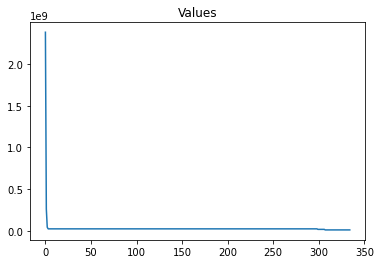

In [13]:
plt.plot(history_book['values'])
plt.title("Values")